### Step 1: Importing required libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

### Step 2: Data Preparation And Visualization

In [6]:
df=pd.read_csv("C:/Users/Saad/Downloads/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


### Step 3: Splitting Data In X and Y

In [10]:
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values
print(X)

[[6.08400000e+00 4.66000000e+00 5.15800000e+00 8.59355000e+07]
 [5.18400000e+00 4.05400000e+00 5.00000000e+00 4.10940000e+07]
 [4.62000000e+00 3.74200000e+00 4.60000000e+00 2.56990000e+07]
 ...
 [4.12149994e+02 3.75880005e+02 4.05160004e+02 9.50742000e+07]
 [3.99500000e+02 3.51299988e+02 3.63799988e+02 9.65611000e+07]
 [4.08730011e+02 3.91299988e+02 3.93470001e+02 6.70684000e+07]]


In [11]:
print(y)

[  4.766      4.392      3.84     ... 380.359985 387.790009 407.339996]


## Applying Machine Learning Algorithms for stock market prediction

### Step 4: Test-Train Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Step 5: Training the Model

In [ ]:
#from sklearn.linear_model import LinearRegression
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

### Step 6: Combining The Actual and Predicted data to match

In [16]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


### Step 7: Validating the Fit

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.46916068356268714
Mean Squared Error: 0.9033937318869631
Root Mean Squared Error: 0.95047026880748


<AxesSubplot:>

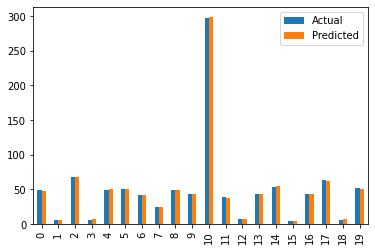

In [20]:
graph = data1.head(20)
graph.plot(kind='bar')